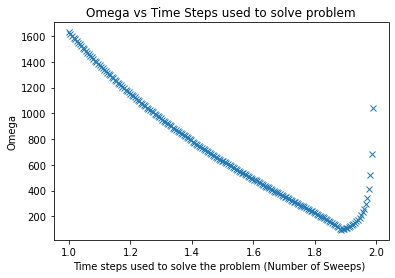

It took: 28.40794277191162 minutes to run


In [1]:
import matplotlib
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import time
import scipy as sp
from scipy import ndimage

start_time=time.time()

#Number of Montecarlo sweeps for calculation
sweeps = 10000

N=50

dt=1
dx=1
M=0.1
a=0.1
k=0.1


def GaussSeidel(phi, omega):
    
    temphi=np.copy(phi)
    for i in range(1,N-1):
        for j in range(1,N-1):
            phi[i,j] = (1-omega)*temphi[i,j] + omega*1/4*(phi[(i+1)%N,j] + phi[(i-1)%N,j]
                                + phi[i,(j+1)%N] + phi[i,(j-1)%N] + rho[i,j])

    
    return phi
                

phi = np.zeros((N,N))
rho = np.zeros((N,N))
rho[int(N/2),int(N/2)]=1
prevphi=np.zeros((N,N))
O = np.linspace(1, 1.99, 200)    
relaxationtimes=np.zeros(len(O))

for o in range(len(O)):
    counter=0
    phi = np.zeros((N,N))
    prevphi=np.zeros((N,N))
    for i in range(sweeps):         
    
        phi=GaussSeidel(phi,O[o])  
        counter+=1
            
        if np.sum(abs(prevphi-phi)) < 10**(-3):
            break
            
        prevphi=np.copy(phi)
        
    relaxationtimes[o]=counter

data=np.vstack((O.flatten(),relaxationtimes.flatten())).T
dataSOR=pd.DataFrame(data)
dataSOR.to_csv('dataSOR2D.csv',index=False)
    
    
    
plt.plot(O,relaxationtimes,"x")
plt.title("Omega vs Time Steps used to solve problem")
plt.xlabel("Time steps used to solve the problem (Number of Sweeps) ")
plt.ylabel("Omega")
plt.show()

    

print("It took: "+str((time.time()-start_time)/60)+" minutes to run")